In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import cv2

In [2]:
#SVD algorithms
def calculate_eigh_ATA(A):
    '''
        Calculate the eigenvalues and eigenvectors of matrix A^T.A
        Arguments:
            A: numpy array - the image
        Returns:
            eigenvalues: numpy array
            eigenvectors: numpy array
    '''
    ATA = np.dot(A.T, A)
    eigenvalues, eigenvectors = la.eigh(ATA)
    eigenvalues = np.maximum(eigenvalues, 0.)

    #Sort descending
    sorted_index = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_index]
    eigenvectors = eigenvectors[:, sorted_index]

    return eigenvalues, eigenvectors

def calculate_svd(A):
    '''
        Using SVD to calculate U, sigma and V^T matrices of matrix A
        Arguments:
            A: numpy array - the image
        Returns:
            U: numpy array
            sigma: numpy array
            V_T: numpy array
    '''
    m = A.shape[0]
    n = A.shape[1]

    #Check to know calculate U or V^T first
    if m >= n:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A.T)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)

        U = eigenvectors

        V = np.zeros([n, n])
        for i in range(n):
            V[:, i] = np.dot(A.T, U[:, i]) / sigma[i][i]
        V_T = V.T
    else:
        eigenvalues, eigenvectors = calculate_eigh_ATA(A)

        sigma = np.zeros([m, n])
        for i in range(min(m, n)):
            sigma[i][i] = max(eigenvalues[i], 0.)
        sigma = np.maximum(np.sqrt(sigma), 0)

        V = eigenvectors
        V_T = V.T

        U = np.zeros([m, m])
        for i in range(m):
            U[:, i] = np.dot(A, V[:, i]) / sigma[i][i]

    return U, sigma, V_T


def find_A_approx(A, rank):
    '''
        Calculate the matrix A_approximately of A with rank using SVD
        Arguments:
            A: numpy array - the image
            rank: int - the rank of the approximate matrix,
                the greater the rank is the more accuracy the approximate image is
        Returns:
            result: numpy array - the approximately image
            error: float - the error of the approximate image
    '''
    U, sigma, V_T = calculate_svd(A)
    #Approximate matrix with rank
    new_A = U[:, :rank] @ sigma[:rank, :rank] @ V_T[:rank, :]
    #Calculate error
    if rank < min(A.shape[0], A.shape[1]):
      error = np.sum(sigma[rank:, :])/ np.sum(sigma)
    else:
      error = 0.
    return new_A, error

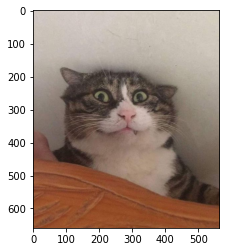

In [3]:
#Load image
default_image = cv2.imread('image2.jpg')
#Because image after load by cv2.imread is BGR, we need to convert to RGB
default_image = cv2.cvtColor(default_image, cv2.COLOR_BGR2RGB)
plt.imshow(default_image)
plt.show()

In [4]:
#Image's shape
default_image.shape

(659, 564, 3)

In [5]:
#Because RGB is a image with 3 layers, we seperated it into 3 channels
red_channel = default_image[:, :, 0]/255.
green_channel = default_image[:, :, 1]/255.
blue_channel = default_image[:, :, 2]/255.

In [6]:
#Channels' shape
print("Red\n", red_channel.shape)
print("Green\n", green_channel.shape)
print("Blue\n", blue_channel.shape)

Red
 (659, 564)
Green
 (659, 564)
Blue
 (659, 564)


In [7]:
print("Red\n", red_channel)
print("Green\n", green_channel)
print("Blue\n", blue_channel)

Red
 [[0.83137255 0.83529412 0.83529412 ... 0.83137255 0.82745098 0.82745098]
 [0.82745098 0.83137255 0.83137255 ... 0.83137255 0.83137255 0.82745098]
 [0.81960784 0.81960784 0.82352941 ... 0.83529412 0.83137255 0.83137255]
 ...
 [0.55294118 0.55294118 0.57647059 ... 0.55294118 0.55686275 0.54509804]
 [0.57647059 0.58039216 0.6        ... 0.54509804 0.54117647 0.5372549 ]
 [0.6        0.6        0.61960784 ... 0.55686275 0.55294118 0.54901961]]
Green
 [[0.79607843 0.8        0.8        ... 0.8        0.79607843 0.79607843]
 [0.79215686 0.79607843 0.79607843 ... 0.8        0.8        0.79607843]
 [0.78431373 0.78431373 0.78823529 ... 0.80392157 0.8        0.8       ]
 ...
 [0.28235294 0.29019608 0.30588235 ... 0.31372549 0.30588235 0.30588235]
 [0.30588235 0.30980392 0.32941176 ... 0.29411765 0.29019608 0.28627451]
 [0.32941176 0.32941176 0.34901961 ... 0.30588235 0.30196078 0.29803922]]
Blue
 [[0.77647059 0.78039216 0.78039216 ... 0.75686275 0.75294118 0.75294118]
 [0.77254902 0.776470

In [8]:
#Find max rank of image
max_rank = la.matrix_rank(blue_channel)
#Get rank for user to compress
while True:
  try:
    rank = int(input("Input rank: "))
    if rank > max_rank:
      print('The number must be equal or less than', max_rank, '! Try again!')
    elif rank < 0:
      print('The number must be positive! Try again!')
    else:
      break
  except ValueError:
    print('Please input a number!. Try again!')
  except:
    print('Something went wrong')

In [11]:
#Compress each channel
red_compressed, _ = find_A_approx(red_channel, rank)
green_compressed, _ = find_A_approx(green_channel, rank)
blue_compressed, _ = find_A_approx(blue_channel, rank)
#Combine them to get compressed image
new_image = np.stack((red_compressed, green_compressed, blue_compressed), axis=2)

In [12]:
new_image

array([[[0.83102779, 0.79191596, 0.77192454],
        [0.83063903, 0.79284561, 0.77312174],
        [0.83171431, 0.7938988 , 0.7743687 ],
        ...,
        [0.83681149, 0.81074261, 0.7727782 ],
        [0.83621333, 0.81020875, 0.77286948],
        [0.83509328, 0.8097248 , 0.77205468]],

       [[0.82970904, 0.79067586, 0.77136269],
        [0.82929939, 0.7915496 , 0.77251856],
        [0.83035577, 0.7926079 , 0.773804  ],
        ...,
        [0.83812195, 0.81159963, 0.77332017],
        [0.83748705, 0.81101642, 0.77335993],
        [0.83634704, 0.81049184, 0.77251777]],

       [[0.83031239, 0.79147391, 0.77236353],
        [0.82981696, 0.79227197, 0.77344044],
        [0.83082447, 0.7933109 , 0.77471421],
        ...,
        [0.84188457, 0.81288164, 0.77488386],
        [0.84121162, 0.81228147, 0.77490057],
        [0.8400676 , 0.81171189, 0.77404636]],

       ...,

       [[0.58795817, 0.30600645, 0.17329584],
        [0.58828521, 0.30639841, 0.17318581],
        [0.58946353, 0

In [13]:
#Shape of the image after compressing
new_image.shape

(659, 564, 3)

In [14]:
rank

10

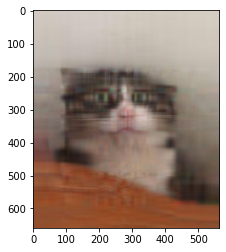

In [15]:
#Show the approximate image of input rank
plt.imshow(new_image)
plt.show()